In [3]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import string
import re
import numpy as np

print(f"Tensor Flow Version: {tf.__version__}")
print()
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "AVAILABLE" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.16.1

GPU is AVAILABLE


In [4]:
keras.__version__

'3.3.3'

Automated select # of heads - Bayes

Optima: num_heads=58.000, exe_time(us)=46.730


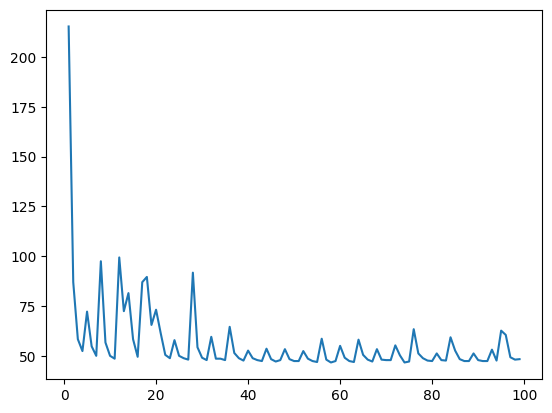

In [102]:
import time
import numpy as np
from numpy import argmax
from matplotlib import pyplot

def sel_headdim(nheads):
    dtype = torch.float16
    torch.random.manual_seed(123)
    batch_size=4
    seqlen=113
    nheads=9

    d=32
    q = torch.randn(
                  batch_size, seqlen, nheads, d, device="cuda", dtype=dtype, requires_grad=True
          )
    k = torch.randn(
                  batch_size, seqlen, nheads, d, device="cuda", dtype=dtype, requires_grad=True
          )
    v = torch.randn(
                  batch_size, seqlen, nheads, d, device="cuda", dtype=dtype, requires_grad=True
          )
    # print(f"q = {q[0]}, k={k[0]}, v={v[0]}")
    t0 = time.time()
    out = flash_attn_func(q, k, v, dropout_p=0.0)
    exe_time = time.time() - t0

    return exe_time*1000*1000

nheads = np.arange(1, 100, 1)
y = [sel_headdim(nheads) for x in nheads]
ix = np.argmin(y)
print('Optima: num_heads=%.3f, exe_time(us)=%.3f' % (nheads[ix], y[ix]))
# plot the points without noise
pyplot.plot(nheads, y)
# show the plot
pyplot.show()

In [75]:
import time
import numpy as np
from numpy import argmax
from matplotlib import pyplot
from warnings import catch_warnings
from warnings import simplefilter
from numpy.random import random
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import norm
from numpy import random

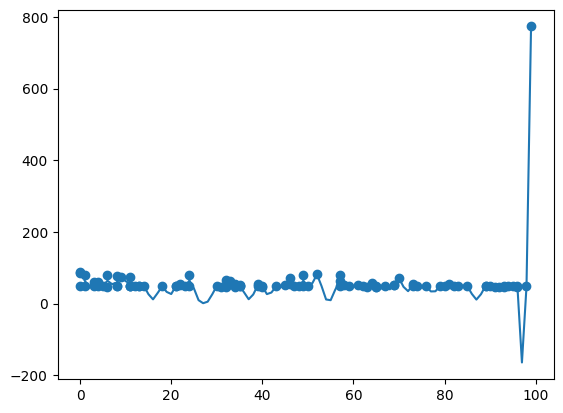

<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: Deprecati

>x=56.000, f()=38.674835, actual=211.000
>x=94.000, f()=48.160552, actual=188.589
>x=94.000, f()=118.374878, actual=190.496
>x=67.000, f()=48.875809, actual=175.714
>x=93.000, f()=48.399065, actual=197.649
>x=28.000, f()=5.516493, actual=183.344
>x=21.000, f()=48.637391, actual=205.994
>x=32.000, f()=52.261351, actual=206.232
>x=23.000, f()=48.875786, actual=238.180


<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: Deprecati

>x=12.000, f()=48.875811, actual=192.881
>x=46.000, f()=62.823303, actual=197.649
>x=48.000, f()=48.160556, actual=153.065
>x=92.000, f()=47.683655, actual=150.204
>x=84.000, f()=50.148763, actual=138.283
>x=42.000, f()=38.573530, actual=233.650
>x=34.000, f()=50.624298, actual=198.603
>x=76.000, f()=48.875809, actual=180.483
>x=67.000, f()=112.294887, actual=151.396


<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: Deprecati

>x=68.000, f()=80.073932, actual=184.536
>x=49.000, f()=64.015320, actual=174.284
>x=75.000, f()=78.854159, actual=163.078
>x=34.000, f()=87.618896, actual=155.449
>x=29.000, f()=129.172089, actual=141.859
>x=52.000, f()=81.539154, actual=153.542
>x=19.000, f()=55.303741, actual=164.509
>x=50.000, f()=49.352700, actual=161.409
>x=4.000, f()=53.962082, actual=153.303
>x=42.000, f()=233.650207, actual=147.820
>x=56.000, f()=211.000427, actual=171.900
>x=3.000, f()=54.001900, actual=146.627


<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: Deprecati

>x=15.000, f()=50.471602, actual=134.468
>x=79.000, f()=48.875811, actual=142.813
>x=14.000, f()=49.114230, actual=121.355
>x=77.000, f()=30.577361, actual=133.276
>x=63.000, f()=47.445293, actual=131.130
>x=9.000, f()=74.386595, actual=144.958
>x=75.000, f()=163.078239, actual=141.621
>x=41.000, f()=135.164307, actual=163.078
>x=18.000, f()=48.160550, actual=169.516
>x=57.000, f()=63.578294, actual=176.907
>x=63.000, f()=89.287708, actual=164.509
>x=58.000, f()=52.928873, actual=161.886


<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: Deprecati

>x=56.000, f()=191.450172, actual=172.377
>x=87.000, f()=-12.292290, actual=164.747
>x=36.000, f()=-6.442612, actual=159.979
>x=73.000, f()=51.259995, actual=197.172
>x=39.000, f()=51.140786, actual=174.046
>x=61.000, f()=51.260025, actual=179.768
>x=22.000, f()=52.690430, actual=180.244
>x=56.000, f()=185.092304, actual=189.066
>x=20.000, f()=144.817938, actual=206.947
>x=6.000, f()=64.015381, actual=210.762


<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: Deprecati

>x=95.000, f()=49.352600, actual=185.013
>x=54.000, f()=52.026615, actual=192.642
>x=74.000, f()=49.114223, actual=199.556
>x=35.000, f()=49.511856, actual=178.814
>x=89.000, f()=49.233436, actual=196.218
>x=82.000, f()=48.637391, actual=204.086
>x=24.000, f()=64.611467, actual=179.768


<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: Deprecati

>x=76.000, f()=114.679580, actual=188.351
>x=82.000, f()=126.361724, actual=166.178
>x=42.000, f()=190.734863, actual=162.601
>x=54.000, f()=192.642210, actual=145.912
>x=85.000, f()=48.875808, actual=163.317
>x=29.000, f()=141.859070, actual=142.336
>x=51.000, f()=117.136421, actual=173.807
>x=74.000, f()=124.334966, actual=155.687


<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: Deprecati

>x=15.000, f()=134.468092, actual=154.018
>x=53.000, f()=98.817668, actual=148.296
>x=95.000, f()=117.182617, actual=143.051
>x=72.000, f()=69.554704, actual=166.893
>x=85.000, f()=106.096191, actual=160.694
>x=48.000, f()=100.612573, actual=158.787
>x=73.000, f()=99.897369, actual=136.375


<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: Deprecati

>x=11.000, f()=55.134411, actual=149.727
>x=11.000, f()=74.052856, actual=144.482
>x=11.000, f()=85.791046, actual=155.449
>x=0.000, f()=74.704468, actual=144.243
>x=64.000, f()=58.650879, actual=144.005
>x=31.000, f()=47.445312, actual=164.032
>x=76.000, f()=139.236389, actual=148.058
>x=27.000, f()=85.408042, actual=171.661


<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: Deprecati

>x=3.000, f()=84.877143, actual=228.167
>x=28.000, f()=183.343896, actual=190.735
>x=80.000, f()=49.591028, actual=183.344
>x=6.000, f()=112.931336, actual=198.841
>x=78.000, f()=64.067301, actual=159.025
>x=32.000, f()=77.923162, actual=173.807
>x=67.000, f()=125.328416, actual=204.086


<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: Deprecati

>x=26.000, f()=101.473180, actual=225.067
>x=40.000, f()=48.041202, actual=227.451
>x=21.000, f()=101.089135, actual=218.153
>x=52.000, f()=117.540298, actual=186.920
>x=28.000, f()=187.039368, actual=169.039
>x=41.000, f()=163.078491, actual=187.874
>x=20.000, f()=206.947287, actual=175.238


<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
<ipython-input-101-5673cb831b22>:90: Deprecati

>x=4.000, f()=78.797119, actual=182.629
>x=73.000, f()=109.016647, actual=182.867
>x=52.000, f()=140.666992, actual=183.105
>x=52.000, f()=151.276550, actual=183.344


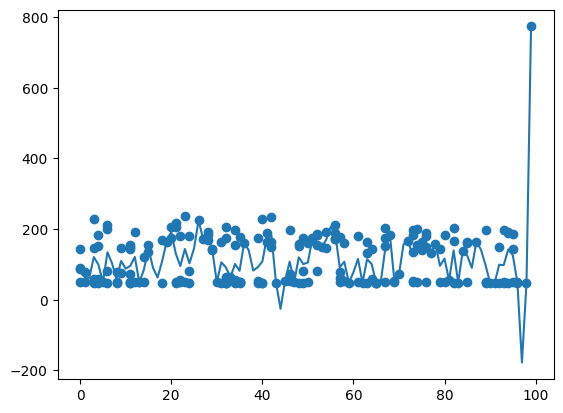

Best Result: num_heads=34.000, exe_time(us)=47.207


<ipython-input-101-5673cb831b22>:101: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Best Result: num_heads=%.3f, exe_time(us)=%.3f' % (X[ix], y[ix]))


In [101]:
def sel_headdim(nheads):
    dtype = torch.float16
    torch.random.manual_seed(123)
    batch_size=4
    seqlen=113
    nheads=9

    d=32
    q = torch.randn(
                  batch_size, seqlen, nheads, d, device="cuda", dtype=dtype, requires_grad=True
          )
    k = torch.randn(
                  batch_size, seqlen, nheads, d, device="cuda", dtype=dtype, requires_grad=True
          )
    v = torch.randn(
                  batch_size, seqlen, nheads, d, device="cuda", dtype=dtype, requires_grad=True
          )
    # print(f"q = {q[0]}, k={k[0]}, v={v[0]}")
    t0 = time.time()
    out = flash_attn_func(q, k, v, dropout_p=0.0)
    exe_time = time.time() - t0

    return exe_time*1000*1000

# surrogate or approximation for the objective function
def surrogate(model, X):
 # catch any warning generated when making a prediction
 with catch_warnings():
 # ignore generated warnings
  simplefilter("ignore")
  DeprecationWarning("ignore")
 return model.predict(X, return_std=True)

# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
 # calculate the best surrogate score found so far
 yhat, _ = surrogate(model, X)
 best = max(yhat)
 # calculate mean and stdev via surrogate function
 mu, std = surrogate(model, Xsamples)
 mu = mu[0]
 # calculate the probability of improvement
 probs = norm.cdf((mu - best) / (std+1E-9))
 return probs

# optimize the acquisition function
def opt_acquisition(X, y, model):
 # random search, generate random samples
 Xsamples = np.asarray([random.randint(100) for x in range(1, 101)])
 Xsamples = Xsamples.reshape(len(Xsamples), 1)
 # calculate the acquisition function for each sample
 scores = acquisition(X, Xsamples, model)
 # locate the index of the largest scores
 ix = argmax(scores)
 return Xsamples[ix, 0]

# plot real observations vs surrogate function
def plot(X, y, model):
 # scatter plot of inputs and real objective function
 pyplot.scatter(X, y)
 # line plot of surrogate function across domain
 Xsamples = np.asarray(np.arange(1, 100, 1))
 Xsamples = Xsamples.reshape(len(Xsamples), 1)
 ysamples, _ = surrogate(model, Xsamples)
 pyplot.plot(Xsamples, ysamples)
 # show the plot
 pyplot.show()


# sample the domain sparsely with noise
X = np.asarray([random.randint(100) for x in range(1, 101)])
y = np.asarray([sel_headdim(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)
# perform the optimization process
for i in range(100):
 # select the next point to sample
 x = opt_acquisition(X, y, model)
 # sample the point
 actual = sel_headdim(x)
 # summarize the finding
 est, _ = surrogate(model, [[x]])
 print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
 # add the data to the dataset
 X = np.vstack((X, [[x]]))
 y = np.vstack((y, [[actual]]))
 # update the model
 model.fit(X, y)

# plot all samples and the final surrogate function
plot(X, y, model)
# best result
ix = np.argmin(y)
print('Best Result: num_heads=%.3f, exe_time(us)=%.3f' % (X[ix], y[ix]))

Softmax Output Approximation for Activation Memory-Efficient Training of Attention-based Networks

https://paperswithcode.com/paper/softmax-output-approximation-for-activation

In [100]:
import torch
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

global select_number
select_number = 5

class softmax_approximation(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, mask):
        global select_number
        ctx.constant = select_number
        S = ctx.constant
        tensor = F.softmax(input, dim=-1)
        m = torch.full(tensor.shape[:-1] + (2*S+1,), -1e1, device=device)

        if mask is not None:
            inner_tensor, index = torch.masked_fill(tensor, ~mask, -10).sort(descending=True)
            index = torch.argsort(index).to(dtype=torch.uint8)

            # save high value
            m[:,:,:,:S] = (torch.topk(inner_tensor,  S)[0]) + 1e-8
            # save low value
            m[:,:,:,-S-1:-1] = (torch.flip(-1*(torch.topk(torch.masked_fill(-inner_tensor, ~mask, -10), S)[0]), dims=(-1,))) + 1e-8

            idx = torch.nonzero(torch.sum(mask, dim=-1) <= 2*S)
            m[idx[:, 0], :, :, :2*S] = inner_tensor[idx[:, 0], :, :, :2*S] + 1e-8

            del idx

        else:
            inner_tensor, index = tensor.sort(descending=True)
            index = torch.argsort(index).to(dtype=torch.uint8)

            # save high value
            m[:,:,:,:S] = inner_tensor[...,:S] + 1e-8
            # save low value
            m[:,:,:,-S-1:-1] = inner_tensor[...,-S:] + 1e-8


        #[beta = (1 / (high * low)).sqrt() * (high - gamma).exp()]
        beta_hat = torch.sqrt(torch.nan_to_num(torch.div(1,torch.mul(m[..., S-1, None], m[..., -S-1, None]))))* \
                (torch.exp(m[..., S-1, None]-inner_tensor[...,S, None]))

        beta_hat = torch.nan_to_num(beta_hat)

        #[y = (-1 / (high**2 * beta**2)).log() * (-1 / beta)]
        sigma = torch.log(torch.nan_to_num(torch.div(1,torch.mul((m[..., S-1, None])**2, beta_hat**2))))* \
                (-1*torch.nan_to_num(torch.div(1,beta_hat)))
        sigma = torch.nan_to_num(sigma)
        # 1 / (1-(1-h_m)) * y * beta

        if mask is not None:
                ss = torch.nan_to_num(torch.div(1,(mask.sum(-1)-2*(S-1)-1).unsqueeze(-1)))
                m[:,:,:,-1] = torch.mul(ss,(torch.mul(beta_hat, torch.mul((sigma),torch.nan_to_num(torch.div(1,1-(m[..., S-1, None]))))))).squeeze(-1)
                del ss

        else:
                m[:,:,:,-1] = torch.mul(torch.div(1, index.shape[-1]),(torch.mul(beta_hat, torch.mul((sigma),torch.nan_to_num(torch.div(1,1-(m[..., S-1, None]))))))).squeeze(-1)

        m = torch.cat((m, torch.exp(tensor).sum(dim=-1).unsqueeze(-1)), dim =-1)

        ctx.save_for_backward(m, index, mask)
        del m, inner_tensor, index, beta_hat, sigma
        return tensor

    @staticmethod
    def backward(ctx, grad_output):
        S = ctx.constant

        m, index, mask = ctx.saved_tensors

        if mask is not None:
            approx_mask = mask.clone()
            approx_mask[(mask.cumsum(dim=-1)) > (mask.cumsum(dim=-1)).gather(-1, (mask.cumsum(dim=-1)).max(-1, keepdim=True)[1]) - S] = False
            approx_mask[...,:S] = False

            select_mask = mask * ~approx_mask


            temp_matrix = torch.zeros_like(index).to(dtype=torch.float32)
            temp_matrix = temp_matrix.masked_scatter(select_mask, m[...,:-2][m[...,:-2] != -1e1])

            arg_value = torch.arange(index.shape[-1] - 2* (S - 1), device=mask.device).unsqueeze(0).expand(index.shape[:-1] + (-1,))

            approx_value = torch.mul(m[...,:,S-1].unsqueeze(-1), torch.exp(-1*torch.mul(m[...,-2, None], arg_value))).to(device)
            approx_value = torch.cat((torch.zeros(index.shape[:-1] + (S-1,), device= mask.device), approx_value, torch.zeros(index.shape[:-1] + (S-1,), device= mask.device)), dim = -1)

            approx_value = approx_value.masked_fill(~approx_mask, 0)
            approx_value = torch.mul(approx_value, (1-(temp_matrix.sum(-1).unsqueeze(-1)))/approx_value.sum(-1).unsqueeze(-1))

            approx_value = approx_value.masked_fill(~approx_mask, -1e1)
            temp_matrix = temp_matrix.masked_scatter(approx_mask, approx_value[approx_value != -1e1])

            temp_matrix = torch.gather(temp_matrix, dim=-1, index=index.type(dtype=torch.int64))
            temp_matrix = temp_matrix.masked_fill(mask==0, 0)

            del approx_mask, select_mask, arg_value, approx_value


        else:
            idx = torch.arange(index.shape[-1]-(2*(S-1))).expand(m.shape[0], m.shape[1], m.shape[2], index.shape[-1]-(2*(S-1))).to(device)
            temp_matrix = torch.mul(m[...,:,S-1].unsqueeze(-1), torch.exp(-1*torch.mul(m[...,-2, None], idx))).to(device)
            temp_matrix[...,1:-1] = torch.mul(temp_matrix[...,1:-1], ((1-m[...,:-2].sum(-1).unsqueeze(-1)) / temp_matrix[...,1:-1].sum(-1).unsqueeze(-1)))
            temp_matrix = torch.cat((m[...,:,:S], temp_matrix[...,1:-1], m[...,:,S:-2]),dim=-1)
            temp_matrix = torch.gather(temp_matrix, dim=-1, index=index.type(dtype=torch.int64))

            del idx

        grad_matrix = torch.diag_embed(temp_matrix) - torch.einsum('...j, ...i -> ...ji', temp_matrix, temp_matrix)

        del m, index, mask, temp_matrix

        return torch.einsum("...i, ...ij", grad_output, grad_matrix), None

In [105]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchtext

from torchtext.legacy.datasets import Multi30k
from torchtext.legacy.data import Field, BucketIterator


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import spacy
import numpy as np

import random
import math
import time

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

spacy_de = spacy.load('de_core_news_sm')
spacy_en = spacy.load('en_core_web_sm')

def tokenize_de(text):
    return [tok.text for tok in spacy_de.tokenizer(text)]

def tokenize_en(text):
    return [tok.text for tok in spacy_en.tokenizer(text)]

SRC = Field(tokenize = tokenize_de,
            init_token = '<sos>',
            eos_token = '<eos>',
            lower = True,
            batch_first = True,
            fix_length=40)

TRG = Field(tokenize = tokenize_en,
            init_token = '<sos>',
            eos_token = '<eos>',
            lower = True,
            batch_first = True,
            fix_length=40)

train_data, valid_data, test_data = Multi30k.splits(exts = ('.de', '.en'),
                                                    fields = (SRC, TRG))


SRC.build_vocab(train_data, min_freq = 2)
TRG.build_vocab(train_data, min_freq = 2)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


BATCH_SIZE = 128

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, valid_data, test_data),
     batch_size = BATCH_SIZE,
     shuffle=True,
     device = device)

print('Created `torchtext_train_dataloader` with %d batches!'%len(train_iterator))

class Encoder(nn.Module):
    def __init__(self, input_dim, hid_dim, n_layers, n_heads, pf_dim, dropout, device, max_length = 100):
        super().__init__()
        self.device = device
        self.tok_embedding = nn.Embedding(input_dim, hid_dim)
        self.pos_embedding = nn.Embedding(max_length, hid_dim)
        self.layers = nn.ModuleList([EncoderLayer(hid_dim, n_heads, pf_dim, dropout, device) for _ in range(n_layers)])
        self.dropout = nn.Dropout(dropout)
        self.scale = torch.sqrt(torch.FloatTensor([hid_dim])).to(device)

    def forward(self, src, src_mask):
        batch_size = src.shape[0]
        src_len = src.shape[1]
        pos = torch.arange(0, src_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        src = self.dropout((self.tok_embedding(src)*self.scale)+self.pos_embedding(pos))

        for layer in self.layers:
            src = layer(src, src_mask)

        return src

class EncoderLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, pf_dim, dropout, device):
        super().__init__()
        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.ff_layer_norm = nn.LayerNorm(hid_dim)
        self.self_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hid_dim, pf_dim, dropout)
        self.dropout = nn.Dropout(dropout)

    def forward(self, src, src_mask):
        _src, _ = self.self_attention(src, src, src, src_mask)
        src = self.self_attn_layer_norm(src + self.dropout(_src))

        _src = self.positionwise_feedforward(src)
        src = self.ff_layer_norm(src + self.dropout(_src))

        return src

class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, dropout, device):
        super().__init__()
        assert hid_dim % n_heads == 0
        self.hid_dim = hid_dim
        self.n_heads = n_heads
        self.head_dim = hid_dim // n_heads

        self.fc_q = nn.Linear(hid_dim, hid_dim)
        self.fc_k = nn.Linear(hid_dim, hid_dim)
        self.fc_v = nn.Linear(hid_dim, hid_dim)
        self.fc_o = nn.Linear(hid_dim, hid_dim)

        self.dropout = nn.Dropout(dropout)

        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)

    def forward(self, query, key, value, mask = None):
        batch_size = query.shape[0]
        Q = self.fc_q(query)
        K = self.fc_k(key)
        V = self.fc_v(value)

        Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0,2,1,3)
        K = K.view(batch_size, -1, self.n_heads, self.head_dim).permute(0,2,1,3)
        V = V.view(batch_size, -1, self.n_heads, self.head_dim).permute(0,2,1,3)

        energy = torch.matmul(Q, K.permute(0,1,3,2)) / self.scale

        if mask is not None:
            energy = energy.masked_fill(mask==0, -1e10)

        attention = softmax_approximation.apply(energy, mask)
        x = torch.matmul(self.dropout(attention), V)
        x = x.permute(0,2,1,3).contiguous()
        x = x.view(batch_size, -1, self.hid_dim)
        x = self.fc_o(x)
        return x, attention

class PositionwiseFeedforwardLayer(nn.Module):
    def __init__(self, hid_dim, pf_dim, dropout):
        super().__init__()

        self.fc_1 = nn.Linear(hid_dim, pf_dim)
        self.fc_2 = nn.Linear(pf_dim, hid_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.dropout(torch.relu(self.fc_1(x)))
        x = self.fc_2(x)
        return x


class Decoder(nn.Module):
    def __init__(self, output_dim, hid_dim, n_layers, n_heads, pf_dim, dropout, device, max_length = 100):
        super().__init__()
        self.device = device
        self.tok_embedding = nn.Embedding(output_dim, hid_dim)
        self.pos_embedding = nn.Embedding(max_length, hid_dim)
        self.layers = nn.ModuleList([DecoderLayer(hid_dim, n_heads, pf_dim, dropout, device) for _ in range(n_layers)])
        self.fc_out = nn.Linear(hid_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
        self.scale = torch.sqrt(torch.FloatTensor([hid_dim])).to(device)

    def forward(self, trg, enc_src, trg_mask, src_mask):
        batch_size = trg.shape[0]
        trg_len = trg.shape[1]

        pos = torch.arange(0, trg_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        trg = self.dropout((self.tok_embedding(trg)*self.scale)+self.pos_embedding(pos))

        for layer in self.layers:
            trg, attention = layer(trg, enc_src, trg_mask, src_mask)

        output = self.fc_out(trg)

        return output, attention

class DecoderLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, pf_dim, dropout, device):
        super().__init__()
        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.enc_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.ff_layer_norm = nn.LayerNorm(hid_dim)
        self.self_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.encoder_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hid_dim, pf_dim, dropout)
        self.dropout = nn.Dropout(dropout)

    def forward(self, trg, enc_src, trg_mask, src_mask):
        _trg, _ = self.self_attention(trg, trg, trg, trg_mask)
        trg = self.self_attn_layer_norm(trg + self.dropout(_trg))
        _trg, attention =  self.encoder_attention(trg, enc_src, enc_src, src_mask)
        trg = self.enc_attn_layer_norm(trg + self.dropout(_trg))
        _trg = self.positionwise_feedforward(trg)
        trg = self.ff_layer_norm(trg + self.dropout(_trg))

        return trg, attention


class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, src_pad_idx, trg_pad_idx, devcie):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.src_pad_idx = src_pad_idx
        self.trg_pad_idx = trg_pad_idx
        self.device = device

    def make_src_mask(self, src):
        src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)
        return src_mask

    def make_trg_mask(self, trg):
        trg_pad_mask = (trg != self.trg_pad_idx).unsqueeze(1).unsqueeze(2)
        trg_len = trg.shape[1]
        trg_sub_mask = torch.tril(torch.ones((trg_len,trg_len), device = self.device)).bool()
        trg_mask = trg_pad_mask & trg_sub_mask

    def forward(self, src, trg):
        src_mask = self.make_src_mask(src)
        trg_mask = self.make_trg_mask(trg)

        enc_src = self.encoder(src, src_mask)

        output, attention = self.decoder(trg, enc_src, trg_mask, src_mask)

        return output, attention

INPUT_DIM = len(SRC.vocab)
OUTPUT_DIM = len(TRG.vocab)
HID_DIM = 256
ENC_LAYERS = 3
DEC_LAYERS = 3
ENC_HEADS = 8
DEC_HEADS = 8
ENC_PF_DIM = 512
DEC_PF_DIM = 512
ENC_DROPOUT = 0.1
DEC_DROPOUT = 0.1

enc = Encoder(INPUT_DIM,
              HID_DIM,
              ENC_LAYERS,
              ENC_HEADS,
              ENC_PF_DIM,
              ENC_DROPOUT,
              device)

dec = Decoder(OUTPUT_DIM,
              HID_DIM,
              DEC_LAYERS,
              DEC_HEADS,
              DEC_PF_DIM,
              DEC_DROPOUT,
              device)


SRC_PAD_IDX = SRC.vocab.stoi[SRC.pad_token]
TRG_PAD_IDX = TRG.vocab.stoi[TRG.pad_token]

model = Seq2Seq(enc, dec, SRC_PAD_IDX, TRG_PAD_IDX, device).to(device)
m = 10
print('User specific value m :', m)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)


LEARNING_RATE = 0.0005

optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)
criterion = nn.CrossEntropyLoss(ignore_index = TRG_PAD_IDX)

def train(model, iterator, optimizer, criterion, clip):
    model.train()
    epoch_loss = 0
    for i, batch in enumerate(iterator):

        src = batch.src
        trg = batch.trg

        optimizer.zero_grad()

        output, _ = model(src, trg[:,:-1])


        output_dim = output.shape[-1]

        output = output.contiguous().view(-1, output_dim)
        trg = trg[:,1:].contiguous().view(-1)


        loss = criterion(output, trg)
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)

        optimizer.step()
        epoch_loss += loss.item()
    print('-'*50)
    return epoch_loss / len(iterator)


def evaluate(model, iterator, criterion):

    model.eval()

    epoch_loss = 0

    with torch.no_grad():

        for i, batch in enumerate(iterator):

            src = batch.src
            trg = batch.trg

            output, _ = model(src, trg[:,:-1])

            output_dim = output.shape[-1]

            output = output.contiguous().view(-1, output_dim)
            trg = trg[:,1:].contiguous().view(-1)

            loss = criterion(output, trg)

            epoch_loss += loss.item()

    return epoch_loss / len(iterator)


def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

N_EPOCHS = 20
CLIP = 1

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    train_loss = train(model, train_iterator, optimizer, criterion, CLIP)
    valid_loss = evaluate(model, valid_iterator, criterion)
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), f'./result/model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')
    start_time = time.time()

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    print(f'SAVE {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')

model.load_state_dict(torch.load(f'./result/model.pt'))

test_loss = evaluate(model, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} |')

ModuleNotFoundError: No module named 'torchtext.legacy'

In [94]:
import math
import torch
from functools import partial
from torch import nn, einsum
from torch.autograd.function import Function

from einops import rearrange

from torch.jit import fork, wait

from torch.cuda.amp import autocast, GradScaler
from torch.nn import DataParallel
# constants

EPSILON = 1e-10


def exists(val):
    return val is not None

def default(val, d):
    return val if exists(val) else d

# flash attention forwards and backwards

# flash attention v1 - https://arxiv.org/abs/2205.14135
# flash attention v2 - https://tridao.me/publications/flash2/flash2.pdf

class FlashAttentionFunction(Function):
    @staticmethod
    @torch.no_grad()
    def forward(ctx, q, k, v, mask, causal, q_bucket_size, k_bucket_size):
        """ Algorithm 1 in the v2 paper """

        device = q.device
        max_neg_value = -torch.finfo(q.dtype).max
        qk_len_diff = max(k.shape[-2] - q.shape[-2], 0)

        o = torch.zeros_like(q)
        all_row_sums = torch.zeros((*q.shape[:-1], 1), device = device)
        all_row_maxes = torch.full((*q.shape[:-1], 1), max_neg_value, device = device)

        scale = (q.shape[-1] ** -0.5)

        num_row_tiles = math.ceil(q.shape[-2] / q_bucket_size)
        num_col_tiles = math.ceil(k.shape[-2] / k_bucket_size)

        if exists(mask) and mask.ndim == 2:
            mask = rearrange(mask, 'b n -> b 1 1 n')

        if not exists(mask):
            col_masks = (None,) * num_col_tiles
            mask = (col_masks,) * num_row_tiles
        else:
            mask = ((mask,) * num_row_tiles) if mask.shape[-2] == 1 else mask.split(q_bucket_size, dim = -2)
            mask = tuple(((row_mask,) * num_col_tiles) if row_mask.shape[-1] == 1 else row_mask.split(k_bucket_size, dim = -1) for row_mask in mask)

        row_splits = zip(
            q.split(q_bucket_size, dim = -2),
            o.split(q_bucket_size, dim = -2),
            mask,
            all_row_sums.split(q_bucket_size, dim = -2),
            all_row_maxes.split(q_bucket_size, dim = -2),
        )

        for ind, (qc, oc, row_mask, row_sums, row_maxes) in enumerate(row_splits):
            q_start_index = ind * q_bucket_size - qk_len_diff

            col_splits = zip(
                k.split(k_bucket_size, dim = -2),
                v.split(k_bucket_size, dim = -2),
                row_mask
            )

            for k_ind, (kc, vc, col_mask) in enumerate(col_splits):
                k_start_index = k_ind * k_bucket_size

                attn_weights = einsum('... i d, ... j d -> ... i j', qc, kc) * scale

                if exists(col_mask):
                    attn_weights.masked_fill_(~col_mask, max_neg_value)

                if causal and q_start_index < (k_start_index + k_bucket_size - 1):
                    causal_mask = torch.ones((qc.shape[-2], kc.shape[-2]), dtype = torch.bool, device = device).triu(q_start_index - k_start_index + 1)
                    attn_weights.masked_fill_(causal_mask, max_neg_value)

                block_row_maxes = attn_weights.amax(dim = -1, keepdims = True)
                new_row_maxes = torch.maximum(block_row_maxes, row_maxes)

                exp_weights = torch.exp(attn_weights - new_row_maxes)

                if exists(col_mask):
                    exp_weights.masked_fill_(~col_mask, 0.)

                block_row_sums = exp_weights.sum(dim = -1, keepdims = True).clamp(min = EPSILON)

                exp_values = einsum('... i j, ... j d -> ... i d', exp_weights, vc)

                exp_row_max_diff = torch.exp(row_maxes - new_row_maxes)

                new_row_sums = exp_row_max_diff * row_sums + block_row_sums

                oc.mul_(exp_row_max_diff).add_(exp_values)

                row_maxes.copy_(new_row_maxes)
                row_sums.copy_(new_row_sums)

            oc.div_(row_sums)

        lse = all_row_sums.log() + all_row_maxes

        ctx.args = (causal, scale, mask, q_bucket_size, k_bucket_size)
        ctx.save_for_backward(q, k, v, o, lse)

        return o

    @staticmethod
    @torch.no_grad()
    def backward(ctx, do):
        """ Algorithm 2 in the v2 paper """

        causal, scale, mask, q_bucket_size, k_bucket_size = ctx.args
        q, k, v, o, lse = ctx.saved_tensors

        device = q.device

        max_neg_value = -torch.finfo(q.dtype).max
        qk_len_diff = max(k.shape[-2] - q.shape[-2], 0)

        dq = torch.zeros_like(q)
        dk = torch.zeros_like(k)
        dv = torch.zeros_like(v)

        row_splits = zip(
            q.split(q_bucket_size, dim = -2),
            o.split(q_bucket_size, dim = -2),
            do.split(q_bucket_size, dim = -2),
            mask,
            lse.split(q_bucket_size, dim = -2),
            dq.split(q_bucket_size, dim = -2)
        )

        for ind, (qc, oc, doc, row_mask, lsec, dqc) in enumerate(row_splits):
            q_start_index = ind * q_bucket_size - qk_len_diff

            col_splits = zip(
                k.split(k_bucket_size, dim = -2),
                v.split(k_bucket_size, dim = -2),
                dk.split(k_bucket_size, dim = -2),
                dv.split(k_bucket_size, dim = -2),
                row_mask
            )

            for k_ind, (kc, vc, dkc, dvc, col_mask) in enumerate(col_splits):
                k_start_index = k_ind * k_bucket_size

                attn_weights = einsum('... i d, ... j d -> ... i j', qc, kc) * scale

                if causal and q_start_index < (k_start_index + k_bucket_size - 1):
                    causal_mask = torch.ones((qc.shape[-2], kc.shape[-2]), dtype = torch.bool, device = device).triu(q_start_index - k_start_index + 1)
                    attn_weights.masked_fill_(causal_mask, max_neg_value)

                p = torch.exp(attn_weights - lsec)

                if exists(col_mask):
                    p.masked_fill_(~col_mask, 0.)

                dv_chunk = einsum('... i j, ... i d -> ... j d', p, doc)
                dp = einsum('... i d, ... j d -> ... i j', doc, vc)

                D = (doc * oc).sum(dim = -1, keepdims = True)
                ds = p * scale * (dp - D)

                dq_chunk = einsum('... i j, ... j d -> ... i d', ds, kc)
                dk_chunk = einsum('... i j, ... i d -> ... j d', ds, qc)

                dqc.add_(dq_chunk)
                dkc.add_(dk_chunk)
                dvc.add_(dv_chunk)

        return dq, dk, dv, None, None, None, None

# main class

# just flash attention in plain pytorch
# it will be way slower than implementing it in CUDA


class FlashAttention(nn.Module):
    def __init__(
        self,
        *,
        dim,
        heads = 8,
        dim_head = 64,
        causal = False,
        q_bucket_size = 512,
        k_bucket_size = 1024,
        parallel = False,
        mixed_precision = False
    ):
        super().__init__()
        self.heads = heads
        self.causal = causal
        self.parallel = parallel
        self.mixed_precision = mixed_precision

        inner_dim = heads * dim_head

        self.to_q = nn.Linear(dim, inner_dim, bias = False)
        self.to_kv = nn.Linear(dim, inner_dim * 2, bias = False)
        self.to_out = nn.Linear(inner_dim, dim, bias = False)

        # memory efficient attention related parameters
        # can be overriden on forward
        self.q_bucket_size = q_bucket_size
        self.k_bucket_size = k_bucket_size

        if self.parallel:
            self.model = DataParallel(self)
        if self.mixed_precision:
            self.scaler = GradScaler()

    def forward(
        self,
        x,
        context = None,
        mask = None,
        q_bucket_size = None,
        k_bucket_size = None,
    ):
        q_bucket_size = default(q_bucket_size, self.q_bucket_size)
        k_bucket_size = default(k_bucket_size, self.k_bucket_size)

        h = self.heads
        context = default(context, x)

        q = self.to_q(x)
        k, v = self.to_kv(context).chunk(2, dim=-1)

        q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h=h), (q, k, v))

        if self.parallel:
            # Split the input data into chunks and move each chunk to the correct GPU
            num_gpus = torch.cuda.device_count()
            x_chunks = x.split(x.size(0) // num_gpus)
            x_chunks = [chunk.to(f'cuda:{i}') for i, chunk in enumerate(x_chunks)]
            q = x_chunks

        if self.mixed_precision:
            # Use autocast to allow operations to run in lower precision
            with autocast():
                out = FlashAttentionFunction.apply(q, k, v, mask, self.causal, q_bucket_size, k_bucket_size)
        else:
            out = FlashAttentionFunction.apply(q, k, v, mask, self.causal, q_bucket_size, k_bucket_size)

        out = rearrange(out, 'b h n d -> b n (h d)')
        return self.to_out(out)

FlashAttention use/test example

In [37]:
import torch
import torch.cuda
import time
import psutil

def test_memory_usage():
    attention = FlashAttention(dim=512, heads=8, dim_head=64).cuda()
    x = torch.randn(1, 1000, 512).cuda()
    torch.cuda.synchronize()
    start_mem = torch.cuda.memory_allocated()
    out = attention(x)
    torch.cuda.synchronize()
    end_mem = torch.cuda.memory_allocated()
    print(f'Memory usage: {end_mem - start_mem} bytes')

def test_speed():
    attention = FlashAttention(dim=512, heads=8, dim_head=64).cuda()
    x = torch.randn(1, 1000, 512).cuda()
    start_time = time.time()
    out = attention(x)
    torch.cuda.synchronize()
    end_time = time.time()
    print(f'Execution time: {end_time - start_time} seconds')

def test_scalability():
    attention = FlashAttention(dim=512, heads=8, dim_head=64).cuda()
    for n in [1000, 2000, 4000, 8000, 16000, 32000]:
        x = torch.randn(1, n, 512).cuda()
        start_time = time.time()
        out = attention(x)
        torch.cuda.synchronize()
        end_time = time.time()
        print(f'Input size: {n}, Execution time: {end_time - start_time} seconds')

def test_error_rate():
    attention = FlashAttention(dim=512, heads=8, dim_head=64).cuda()
    x = torch.randn(1, 1000, 512).cuda()
    y = torch.randn(1, 1000, 512).cuda()
    out_x = attention(x)
    out_y = attention(y)
    error_rate = (out_x != out_y).float().mean().item()
    print(f'Error rate: {error_rate}')


def test_forward():
    attention = FlashAttention(dim=512, heads=8, dim_head=64)
    x = torch.randn(1, 1000, 512)
    out = attention(x)
    assert out.shape == (1, 1000, 512), f'Unexpected output shape: {out.shape}'

def test_backward():
    attention = FlashAttention(dim=512, heads=8, dim_head=64)
    x = torch.randn(1, 1000, 512, requires_grad=True)
    out = attention(x)
    out.sum().backward()
    assert x.grad is not None, 'No gradient computed'


test_memory_usage()
test_speed()
test_scalability()
test_error_rate()
test_forward()
test_backward()

Memory usage: 18906624 bytes
Execution time: 0.001855611801147461 seconds
Input size: 1000, Execution time: 0.0016260147094726562 seconds
Input size: 2000, Execution time: 0.0050580501556396484 seconds
Input size: 4000, Execution time: 0.01616191864013672 seconds
Input size: 8000, Execution time: 0.05944228172302246 seconds
Input size: 16000, Execution time: 0.20696234703063965 seconds
Input size: 32000, Execution time: 0.7386753559112549 seconds
Error rate: 1.0


In [5]:
from flash_attn import flash_attn_qkvpacked_func, flash_attn_func

In [6]:
import math

import pytest
import torch
import torch.nn.functional as F
from einops import rearrange, repeat
from flash_attn import (
    flash_attn_func,
    flash_attn_kvpacked_func,
    flash_attn_qkvpacked_func,
    flash_attn_varlen_func,
    flash_attn_varlen_kvpacked_func,
    flash_attn_varlen_qkvpacked_func,
    flash_attn_with_kvcache,
)
from flash_attn.bert_padding import pad_input, unpad_input
from flash_attn.flash_attn_interface import _get_block_size_n
from flash_attn.layers.rotary import apply_rotary_emb

MAX_HEADDIM_SM8x = 192

Data

In [7]:
# get the file path
file_path = "/content/drive/MyDrive/Colab Notebooks/eng_-french.csv"

# read the data
df = pd.read_csv(file_path)
df['source'] = df['English words/sentences']

# let's add an initial “seed” token ([start]) and a stop token ([end]) to each target sentence.
df['target'] = df['French words/sentences'].apply(lambda x: '[start] ' + x + ' [end]')
df = df.drop(['English words/sentences', 'French words/sentences'], axis=1)

# display a few random samples
df.sample(5)

,source,target
75645,I figured something was up.,[start] J'ai songé qu'il se passait quelque ch...
22960,Don't trust anyone.,[start] Ne vous fiez à quiconque ! [end]
115047,I need you to check on something.,[start] J'ai besoin que vous vérifiiez quelque...
37524,There is another way.,[start] Il y a une autre façon. [end]
123982,Final exams are two weeks from now.,[start] Les examens finaux sont dans deux sema...


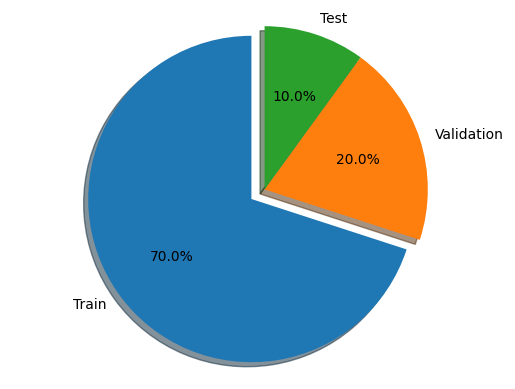

In [8]:
# shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

# split the data into train, validation, and test sets
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.2)
test_size = int(len(df) * 0.1)

train_df = df[:train_size]
val_df = df[train_size:train_size+val_size]
test_df = df[train_size+val_size:]

# display the data sets representations using a pie chart just to see the distribution of the data
labels = 'Train', 'Validation', 'Test'
sizes = [len(train_df), len(val_df), len(test_df)]
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [9]:
max_tokens = 25000
sequence_length = 64

# define a custom standardization function that convert to lowercase and strips all punctuations except "[" and "]" (so we can tell apart "start" from "[start]").
strip_chars = string.punctuation
strip_chars = strip_chars.replace("[", "")
strip_chars = strip_chars.replace("]", "")

def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(
        lowercase, f"[{re.escape(strip_chars)}]", "")

# tokenize the data using our custom standardization function
source_vectorization = keras.layers.TextVectorization(
    max_tokens=max_tokens,
    output_mode="int",
    output_sequence_length=sequence_length,
)
target_vectorization = keras.layers.TextVectorization(
    max_tokens=max_tokens,
    output_mode="int",
    output_sequence_length=sequence_length + 1, # add +1 token to our target sentences since they'll be shifted right by 1 during training
    standardize=custom_standardization,
)

# index all tokens in the source and target sentences
train_source_texts = train_df['source'].values
train_target_texts = train_df['target'].values
source_vectorization.adapt(train_source_texts)
target_vectorization.adapt(train_target_texts)

In [10]:
# display a random sample before and after vectorization just to test the vectorization
random_sample = random.randint(0, len(train_df))
print("Source texts (one random sample):", train_source_texts[random_sample])
print("Target texts (one random sample):", train_target_texts[random_sample])
print("Source vectors (one random sample):", source_vectorization(train_source_texts[random_sample]).dtype)
print("Target vectors (one random sample):", target_vectorization(train_target_texts[random_sample]))

# display the decoding of the vectorized text (from vector back to text) just to test the vectorization
source_decoded_text = ''
for i in range(len(source_vectorization(train_source_texts[random_sample]))):
    source_decoded_text += source_vectorization.get_vocabulary()[source_vectorization(train_source_texts[random_sample])[i]] + ' '
print("Source decoded texts (one random sample):", source_decoded_text)

target_decoded_text = ''
for i in range(len(target_vectorization(train_target_texts[random_sample]))):
    target_decoded_text += target_vectorization.get_vocabulary()[target_vectorization(train_target_texts[random_sample])[i]] + ' '
print("Target decoded texts (one random sample):", target_decoded_text)

Source texts (one random sample): How is your mother?
Target texts (one random sample): [start] Comment va votre mère ? [end]
Source vectors (one random sample): <dtype: 'int64'>
Target vectors (one random sample): tf.Tensor(
[   2   73  121   54 5906    3    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0], shape=(65,), dtype=int64)
Source decoded texts (one random sample): how is your mother                                                             
Target decoded texts (one random sample): [start] comment va votre mère  [end]                                                            


In [11]:
# display the shape of our vectorized data
train_source_vectors = source_vectorization(train_source_texts)
train_target_vectors = target_vectorization(train_target_texts)
print("Source vectors (shape):", train_source_vectors.shape)
print("Target vectors (shape):", train_target_vectors.shape)

Source vectors (shape): (122934, 64)
Target vectors (shape): (122934, 65)


In [12]:
class PositionalEmbedding(keras.layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = keras.layers.Embedding(input_dim=input_dim, output_dim=output_dim) # token embedding layer
        self.position_embeddings = keras.layers.Embedding(input_dim=sequence_length, output_dim=output_dim) # position embedding layer
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):
        embedded_tokens = self.token_embeddings(inputs) # embed the tokens
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1) # create the positional information
        embedded_positions = self.position_embeddings(positions) # embed the positions
        # print(f"self.sequence_length = {self.sequence_length}")
        return embedded_tokens + embedded_positions # add the token and position embeddings to create the positional embeddings

    def compute_mask(self, inputs, mask=None):
        return keras.ops.not_equal(inputs, 0)

    def get_config(self):
        config = super(PositionalEmbedding, self).get_config()
        config.update({
            "input_dim": self.input_dim,
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
        })
        return config

In [48]:
# display a random sample before and after embbeding just to test our class

embed_dim = 64

with tf.device('cpu:0'):
    train_source_embedded = PositionalEmbedding(
        sequence_length=sequence_length,
        input_dim=max_tokens,
        output_dim=embed_dim,
        name="source_embedding",
    ) (train_source_vectors)

    train_target_embedded = PositionalEmbedding(
        sequence_length=sequence_length,
        input_dim=max_tokens,
        output_dim=embed_dim,
        name="target_embedding",
    ) (train_source_vectors)

    random_sample = random.randint(0, len(train_df))

    print("Source texts (one random sample):", train_source_texts[random_sample])
    print("Target texts (one random sample):", train_target_texts[random_sample])
    print("Source vectors (one random sample):", source_vectorization(train_source_texts[random_sample]))
    print("Target vectors (one random sample):", target_vectorization(train_target_texts[random_sample]))
    print("Source embedded vectors (one random sample):", train_source_embedded[random_sample].shape)
    print("Target embedded vectors (one random sample):", train_target_embedded[random_sample])

Source texts (one random sample): There's a song I want to sing for you.
Target texts (one random sample): [start] Il y a une chanson que je souhaite vous chanter. [end]
Source vectors (one random sample): tf.Tensor(
[206   6 601   2  28   4 510  21   3   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0], shape=(64,), dtype=int64)
Target vectors (one random sample): tf.Tensor(
[  2  13  50  19  23 654   7   4 850  12 544   3   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0], shape=(65,), dtype=int64)
Source embedded vectors (one random sample): (64, 64)
Target embedded vectors (one random sample): tf.Tensor(
[[-0.04679302  0.03906684 -0.04080786 ... -0.0

In [14]:
# display the shape of our embedded data just to test the class
print("Source embedded vectors (shape):", train_source_embedded.shape)
print("Target embedded vectors (shape):", train_target_embedded.shape)
train_source_embedded = torch.tensor(train_source_embedded.numpy(), dtype=torch.float32)
train_target_embedded = torch.tensor(train_source_embedded.numpy(), dtype=torch.float32)

Source embedded vectors (shape): (122934, 64, 64)
Target embedded vectors (shape): (122934, 64, 64)


In [47]:
class PositionalEmbedding(keras.layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = keras.layers.Embedding(input_dim=input_dim, output_dim=output_dim) # token embedding layer
        self.position_embeddings = keras.layers.Embedding(input_dim=sequence_length, output_dim=output_dim) # position embedding layer
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):
        embedded_tokens = self.token_embeddings(inputs) # embed the tokens
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1) # create the positional information
        embedded_positions = self.position_embeddings(positions) # embed the positions
        # print(f"self.sequence_length = {self.sequence_length}")
        return embedded_tokens + embedded_positions # add the token and position embeddings to create the positional embeddings

    def compute_mask(self, inputs, mask=None):
        return keras.ops.not_equal(inputs, 0)

    def get_config(self):
        config = super(PositionalEmbedding, self).get_config()
        config.update({
            "input_dim": self.input_dim,
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
        })
        return config

In [49]:
# credits to OpenAI for that one (https://github.com/openai/gpt-2/blob/master/src/model.py)

def shape_list(x):
    """Deal with dynamic shape in tensorflow cleanly."""
    static = x.shape.as_list()
    dynamic = tf.shape(x)
    return [dynamic[i] if s is None else s for i, s in enumerate(static)]

def attention_mask(nd, ns, *, dtype):
    """1's in the lower triangle, counting from the lower right corner.
    Same as tf.matrix_band_part(tf.ones([nd, ns]), -1, ns-nd), but doesn't produce garbage on TPUs.
    """
    i = tf.range(nd)[:,None]
    j = tf.range(ns)
    m = i >= j - ns + nd
    return tf.cast(m, dtype)

def mask_attn_weights(w):
    # w has shape [batch, heads, dst_sequence, src_sequence], where information flows from src to dst.
    _, _, nd, ns = shape_list(w)
    b = attention_mask(nd, ns, dtype=w.dtype)
    b = tf.reshape(b, [1, 1, nd, ns])
    w = w*b - tf.cast(1e10, w.dtype)*(1-b)
    return w

In [50]:
# display the causal masking of a random tensor just to test the function
random_tensor = tf.random.uniform(shape=(1, 1, 5, 5), minval=0, maxval=1, dtype=tf.float32)
print("Masked attention weights:", mask_attn_weights(random_tensor))

Masked attention weights: tf.Tensor(
[[[[ 8.0815184e-01 -1.0000000e+10 -1.0000000e+10 -1.0000000e+10
    -1.0000000e+10]
   [ 6.4942467e-01  4.1794610e-01 -1.0000000e+10 -1.0000000e+10
    -1.0000000e+10]
   [ 5.1032770e-01  1.5359294e-01  9.4846690e-01 -1.0000000e+10
    -1.0000000e+10]
   [ 8.8146591e-01  8.6146212e-01  5.9323192e-01  6.8857408e-01
    -1.0000000e+10]
   [ 3.5868287e-01  3.7894189e-01  1.2398362e-01  5.7484865e-01
     8.1098258e-01]]]], shape=(1, 1, 5, 5), dtype=float32)


In [53]:
def scaled_dot_product_attention(q, k, v, use_causal_mask=False):
    #d_k = tf.cast(tf.shape(k)[-1], tf.float16)
    d_k = tf.cast(tf.shape(k)[-1], tf.float32)
    scores = tf.matmul(q, k, transpose_b=True) # Matmul of Q and K
    scaled_scores = scores / tf.math.sqrt(d_k) # Scale
    if use_causal_mask:
        scaled_scores = mask_attn_weights(scaled_scores) # Mask (opt.)
    weights = tf.nn.softmax(scaled_scores, axis=-1) # SoftMax
    output = tf.matmul(weights, v) # Matmul of SoftMax and V
    return output

In [54]:
# display the shape of our attention output just to test the function
with tf.device('cpu:0'):
    input = train_source_embedded
    input = tf.expand_dims(input, axis=1)
    print("Scaled dot product attention (shape):", scaled_dot_product_attention(input, input, input, use_causal_mask=True).shape)

Scaled dot product attention (shape): (122934, 1, 64, 64)


In [55]:
batch_size = 4

def format_dataset(source, target):
    source_vectors = source_vectorization(source)
    target_vectors = target_vectorization(target)
    return ({
        "source": source_vectors, # encoder_inputs
        "target": target_vectors[:, :-1], # decoder_inputs (truncate by 1 to keep it at the same length as decoder_outputs, which is shifted right by 1).
    }, target_vectors[:, 1:]) # decoder_outputs

def make_dataset(df):
    dataset = tf.data.Dataset.from_tensor_slices((df["source"].values, df["target"].values))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset, num_parallel_calls=4)
    return dataset.shuffle(2048).prefetch(16).cache()

train_ds = make_dataset(train_df)
val_ds = make_dataset(val_df)

In [56]:
# display the shape of the first batch of data in the dataset just to see what it looks like
for batch in train_ds.take(1):
    print("Encoder Inputs:", batch[0]["source"].shape)
    print("Decoder Inputs:", batch[0]["target"].shape)
    print("Decoder Outputs:", batch[1].shape)

Encoder Inputs: (4, 64)
Decoder Inputs: (4, 64)
Decoder Outputs: (4, 64)


In [95]:
#flash
class MultiHeadAttention(keras.layers.Layer):
    def __init__(self, embed_dim, h, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.h = h # nheads
        if embed_dim % h != 0:
            raise ValueError(
                f"dimension of the embedding space = {embed_dim} should be divisible by number of heads = {h}"
            )
        self.q_linear = keras.layers.Dense(embed_dim)
        self.k_linear = keras.layers.Dense(embed_dim)
        self.v_linear = keras.layers.Dense(embed_dim)
        self.concat_linear = keras.layers.Dense(embed_dim)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, shape=(batch_size, -1, self.h, self.embed_dim // self.h))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def flash_split_heads(self, x, batch_size):
        x = tf.reshape(x, shape=(batch_size, -1, self.h, self.embed_dim // self.h))
        return tf.transpose(x, perm=[0, 1, 2, 3])

    def concat_heads(self, x, batch_size):
        x = tf.transpose(x, perm=[0, 2, 1, 3])
        return tf.reshape(x, (batch_size, -1, self.embed_dim))

    def flash_concat_heads(self, x, batch_size):
        x = tf.transpose(x, perm=[0, 2, 1, 3])
        return tf.reshape(x, (batch_size, -1, self.embed_dim))

    def call(self, x, q, k, v, use_causal_mask=False):
        batch_size = tf.shape(k)[0]
        q = self.q_linear(q)
        k = self.k_linear(k)
        v = self.v_linear(v)
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)
        # attention = scaled_dot_product_attention(q, k, v, use_causal_mask)
        flash_att = FlashAttention(dim=self.embed_dim, heads=self.h, causal=use_causal_mask, dim_head=self.embed_dim // self.h).cuda()
        attention = flash_att(x)
        # print("attention")

        concat = self.concat_heads(attention, batch_size)
        concat = self.concat_linear(concat)

        return concat

    def get_config(self):
        config = super(MultiHeadAttention, self).get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "h": self.h,
        })
        return config

In [97]:
# no flash
class MultiHeadAttention(keras.layers.Layer):
    def __init__(self, embed_dim, h, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.h = h # nheads
        if embed_dim % h != 0:
            raise ValueError(
                f"dimension of the embedding space = {embed_dim} should be divisible by number of heads = {h}"
            )
        self.q_linear = keras.layers.Dense(embed_dim)
        self.k_linear = keras.layers.Dense(embed_dim)
        self.v_linear = keras.layers.Dense(embed_dim)
        self.concat_linear = keras.layers.Dense(embed_dim)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, shape=(batch_size, -1, self.h, self.embed_dim // self.h))
        return tf.transpose(x, perm=[0, 2, 1, 3])


    def concat_heads(self, x, batch_size):
        x = tf.transpose(x, perm=[0, 2, 1, 3])
        return tf.reshape(x, (batch_size, -1, self.embed_dim))


    def call(self, q, k, v, use_causal_mask=False):
        batch_size = tf.shape(k)[0]
        q = self.q_linear(q)
        k = self.k_linear(k)
        v = self.v_linear(v)
        flash_q = q
        flash_k = k
        flash_v = v
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        attention = scaled_dot_product_attention(q, k, v, use_causal_mask)
        concat = self.concat_heads(attention, batch_size)
        concat = self.concat_linear(concat)

        return concat

    def get_config(self):
        config = super(MultiHeadAttention, self).get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "h": self.h,
        })
        return config

In [96]:
class TransformerEncoder(keras.layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.layer_norm_1 = keras.layers.LayerNormalization()
        self.layer_norm_2 = keras.layers.LayerNormalization()
        self.global_self_attention = MultiHeadAttention(embed_dim=embed_dim, h=num_heads, causal=use_causal_mask)
        self.feed_forward = keras.Sequential(
            [keras.layers.Dense(dense_dim, activation="relu"),
             keras.layers.Dense(embed_dim),]
        )

    def call(self, x):
        # Post layer normalization + residual connections
        x = self.layer_norm_1(x + self.global_self_attention(x=x, q=x, k=x, v=x))
        x = self.layer_norm_2(x + self.feed_forward(x))
        return x

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "dense_dim": self.dense_dim,
            "num_heads": self.num_heads,
        })
        return config

In [98]:
class TransformerDecoder(keras.layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.causal_self_attention = MultiHeadAttention(embed_dim=embed_dim, h=num_heads)
        self.cross_attention = MultiHeadAttention(embed_dim=embed_dim, h=num_heads)
        self.feed_forward = keras.Sequential(
            [keras.layers.Dense(dense_dim, activation="relu"),
             keras.layers.Dense(embed_dim),]
        )
        self.layer_norm_1 = keras.layers.LayerNormalization()
        self.layer_norm_2 = keras.layers.LayerNormalization()
        self.layer_norm_3 = keras.layers.LayerNormalization()

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "dense_dim": self.dense_dim,
            "num_heads": self.num_heads,
        })
        return config

    def call(self, x, context):
        # Post layer normalization + residual connections
        x = self.layer_norm_1(x + self.causal_self_attention(x=x, q=x, k=x, v=x, use_causal_mask=True))
        x = self.layer_norm_2(x + self.cross_attention(x=x, q=x, k=context, v=context))
        x = self.layer_norm_3(x + self.feed_forward(x))
        return x

In [99]:
embed_dim = 32 # dimension of the embedding space
dense_dim = 128 # dimension of the feed forward network (a rule of thumb is to use 4 times the size of the embeddings)
num_heads = 4

# the transformer body
encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="source")
x = PositionalEmbedding(sequence_length, max_tokens, embed_dim)(encoder_inputs)
encoder_outputs = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="target")
x = PositionalEmbedding(sequence_length, max_tokens, embed_dim)(decoder_inputs)
x = TransformerDecoder(embed_dim, dense_dim, num_heads)(x, encoder_outputs)

# the transformer head
x = keras.layers.Dropout(0.5)(x)
decoder_outputs = keras.layers.Dense(max_tokens, activation="softmax")(x)

transformer = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

NameError: name 'use_causal_mask' is not defined

In [72]:
transformer.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

EPOCHS = 3
checkpoint_filepath = '/tmp/checkpoint.weights.h5'
callbacks_list = [
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=3,
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=6,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_loss',
        mode='min',
        save_best_only=True
    ),
]

transformer.fit(train_ds,
                epochs=EPOCHS,
                callbacks=callbacks_list,
                validation_data=val_ds)

transformer.load_weights(checkpoint_filepath)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:877: UserWarning: Layer 'multi_head_attention_6' (of type MultiHeadAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:877: UserWarning: Layer 'multi_head_attention_7' (of type MultiHeadAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


30734/30734 ━━━━━━━━━━━━━━━━━━━━ 158s 5ms/step - accuracy: 0.9055 - loss: 0.9592 - val_accuracy: 0.9243 - val_loss: 0.6127 - learning_rate: 0.0010
Epoch 2/3
30734/30734 ━━━━━━━━━━━━━━━━━━━━ 125s 4ms/step - accuracy: 0.9209 - loss: 0.6364 - val_accuracy: 0.9260 - val_loss: 0.5819 - learning_rate: 0.0010
Epoch 3/3
30734/30734 ━━━━━━━━━━━━━━━━━━━━ 128s 4ms/step - accuracy: 0.9226 - loss: 0.6111 - val_accuracy: 0.9278 - val_loss: 0.5674 - learning_rate: 0.0010


In [73]:
target_vocab = target_vectorization.get_vocabulary()
target_index_lookup = dict(zip(range(len(target_vocab)), target_vocab))
max_decoded_sentence_length = 30

def decode_sequence(input_sentence):
    tokenized_input_sentence = source_vectorization([input_sentence])
    decoded_sentence = "[start]"
    for i in range(max_decoded_sentence_length):
        tokenized_target_sentence = target_vectorization(
            [decoded_sentence])[:, :-1]
        predictions = transformer(
            [tokenized_input_sentence, tokenized_target_sentence])
        sampled_token_index = np.argmax(predictions[0, i, :])
        sampled_token = target_index_lookup[sampled_token_index]
        decoded_sentence += " " + sampled_token
        if sampled_token == "[end]":
            break
    return decoded_sentence

# let's translate 50 random sentences
for i in range(50):
    random_index = np.random.randint(0, len(test_df))
    input_sentence = test_df["source"].iloc[random_index]
    print(input_sentence)
    print(decode_sequence(input_sentence))
    print()

Do you think that'll work?
[start] estce que tu pense ce qui est [end]

Tom is a left-handed pitcher, but bats right-handed.
[start] tom est une de en train de en train de en train de le en en train sont une une une une un de le de le de le en

Hand me that broom.
[start] les sont les vous êtes de la voiture [end]

The meeting was just about over.
[start] le en train de la voiture de en train de le en train de le en en en en en en train a a a a a sont une est

Are you through with your breakfast?
[start] estce que tu me êtes en train de le faire [end]

The policeman arrested the thief.
[start] le en a a a a un de vous êtes la voiture [end]

The victim declined to press charges.
[start] le vous a un de en train de en train de le en en train de le en en en de le en a sont a sont de le en

You've never had a boyfriend, have you?
[start] tu ne me me êtes jamais de vous [end]

My work is not as easy as yours.
[start] ma vous êtes en faire les vous êtes de la voiture [end]

I think it's perf